    rank                                            feature  importance_split  \
0      1                                       ctrx_quarter               355   
1      2                                    mpasivos_margen               307   
2      3                                 ctrx_quarter_lag_1               203   
3      4                                       cpayroll_trx                81   
4      5                                           mpayroll               148   
5      6                              mprestamos_personales               166   
6      7                    ratio_mcaja_ahorro_ccaja_ahorro               224   
7      8                              mtarjeta_visa_consumo               162   
8      9                                  mcuenta_corriente               228   
9     10                                     mcuentas_saldo               350   
10    11                                       mcaja_ahorro               216   
11    12                    

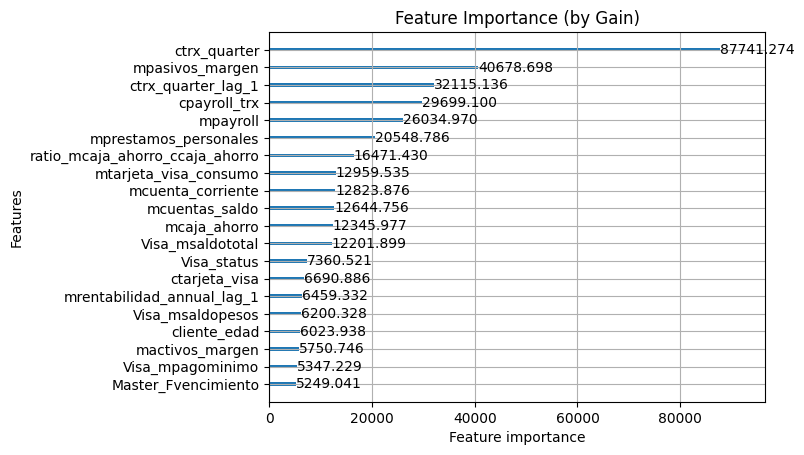

In [4]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load model from .txt file
model = lgb.Booster(model_file='../output/lgbm/model/_20251003.txt')

# 2. Get feature importances (by split or gain)
importance_split = model.feature_importance(importance_type='split')
importance_gain = model.feature_importance(importance_type='gain')
feature_names = model.feature_name()

# 3. Combine into a DataFrame (optional, for clarity)
df_importance = (
    pd.DataFrame({
        'feature': feature_names,
        'importance_split': importance_split,
        'importance_gain': importance_gain
    })
    .sort_values(by='importance_gain', ascending=False)
    .reset_index(drop=True)
)

# 4. Add a rank number column (starting at 1)
df_importance.index = df_importance.index + 1
df_importance.reset_index(inplace=True)
df_importance.rename(columns={'index': 'rank'}, inplace=True)

# 5. Display the top features
print(df_importance.head(40))

# 6. Plot (optional)
lgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.title("Feature Importance (by Gain)")
plt.show()
